In [ ]:
""" After looking and searching too long
Now it is time to finally get a nice plot """

In [ ]:
""" first get the correct data (x, y, z) """

In [2]:
import requests
import json
import numpy as np
import pandas as pd

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

import rasterio as rt
from rasterio.mask import mask

%matplotlib inline
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon

import plotly.graph_objects as go

from typing import Dict 

In [3]:
address = "Lange Van Sterbeeckstraat 8, 2060 Antwerpen"

In [4]:
def get_address_data_from_geopunt(address: str):
    data = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
#    print(data,"\n")
    info = {'address' : address, 
                'x_value' : data['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : data['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : data['LocationResult'][0]['Thoroughfarename'],
                'house_number' : data['LocationResult'][0]['Housenumber'], 
                'postcode': data['LocationResult'][0]['Zipcode'], 
                'municipality' : data['LocationResult'][0]['Municipality']}
    
    detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
    building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    build = requests.get(building['gebouw']['detail']).json()
    info['polygon'] = [build['geometriePolygoon']['polygon']]
#    print(info['polygon'][0]['coordinates'][0])
#    print(info['polygon'][1]['coordinates'][1])
    
    
    return info

In [5]:
address_info = get_address_data_from_geopunt(address)
address_info

{'address': 'Lange Van Sterbeeckstraat 8, 2060 Antwerpen',
 'x_value': 153908.9,
 'y_value': 212660.38,
 'street': 'Lange Van Sterbeeckstraat',
 'house_number': '8',
 'postcode': '2060',
 'municipality': 'Antwerpen',
 'polygon': [{'coordinates': [[[153913.09697395563, 212652.07560559362],
     [153909.20398195833, 212669.40699760243],
     [153904.5820299536, 212668.39899760485],
     [153907.5011979565, 212656.54043759406],
     [153908.57345395535, 212652.1845335923],
     [153908.816653952, 212651.1965655908],
     [153909.12673395127, 212651.2602455914],
     [153913.09697395563, 212652.07560559362]]],
   'type': 'Polygon'}]}

In [17]:
import pandas as pd
import rioxarray
from mpl_toolkits import mplot3d
#from mpl_toolkits import axes3d
import numpy as np
import rasterio
from rasterio.plot import show

import matplotlib.pyplot as plt
%matplotlib inline

#dtm_src = 'data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif'

#dtm_img = rasterio.open(dtm_src)
#dtm_array = dtm_img.read()
xds = rioxarray.open_rasterio('data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif', masked=True)



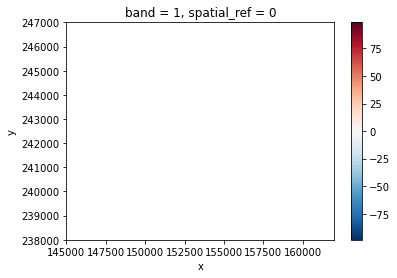

In [18]:
xds.plot()

In [6]:
poly = address_info["polygon"]
type(poly)


list

In [7]:
x_arr = []
y_arr = []

pv = poly[0]['coordinates']
 #print(pv)
for i in range(len(pv)):
    #print(pv[i])
    lst = pv[i]
for j in range(len(lst)):
    #print(lst[j])
    x_arr.append(lst[j][0])
    y_arr.append(lst[j][1])
x_arr = np.array(x_arr)
y_arr = np.array(y_arr)
print("x: ", x_arr)
print("y: ", y_arr)  


x:  [153913.09697396 153909.20398196 153904.58202995 153907.50119796
 153908.57345396 153908.81665395 153909.12673395 153913.09697396]
y:  [212652.07560559 212669.4069976  212668.3989976  212656.54043759
 212652.18453359 212651.19656559 212651.26024559 212652.07560559]


In [21]:
""" create the plot """

# get the min and maxes of address polygon's x and y
x_min = x_arr.min()
x_max = x_arr.max()
y_min = y_arr.min()
y_max = y_arr.max()

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.]
50
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


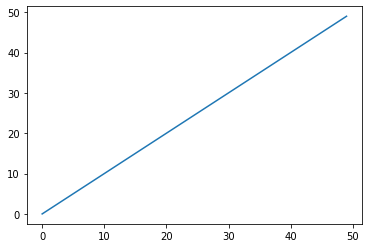

In [19]:
""" create the raster """
# bounderies of the square sides holding the poligon
x_len = np.arange(0, x_max - x_min)
y_len = np.arange(0, y_max - y_min)
print(y_len)
# bounderies of the enlarged square for later cropping of the .tif map
#xl_len = np.arange(x_min - 10, x_max + 10)
xl_len = np.arange(50)
print(len(xl_len))
#yl_len = np.arange(y_min - 10, y_max + 10)
yl_len = np.arange(50)
print(yl_len)
X = xl_len
Y = yl_len

# create 2D plot
np.meshgrid(X, Y)

plt.plot(X, Y)
plt.show()


In [ ]:
import rioxarray
%matplotlib inline
xds = rioxarray.open_rasterio("data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif", masked=True,)
xds.plot()


In [2]:
geometries = [
    {'type': 'Polygon',
    'coordinates': [[
     [153913.09697395563, 212652.07560559362],
     [153909.20398195833, 212669.40699760243],
     [153904.5820299536, 212668.39899760485],
     [153907.5011979565, 212656.54043759406],
     [153908.57345395535, 212652.1845335923],
     [153908.816653952, 212651.1965655908],
     [153909.12673395127, 212651.2602455914],
     [153913.09697395563, 212652.07560559362]
    ]]
    }
]
clipped = xds.rio.clip(geometries)

NoDataInBounds: No data found in bounds.

In [3]:
clipped.plot()

NameError: name 'clipped' is not defined

In [27]:
# get the right canopy data

#zarray = 



np.meshgrid(X, Y)

#plt.plot_surface(X, Y, array)

[array([[153894.58202995, 153895.58202995, 153896.58202995, ...,
         153920.58202995, 153921.58202995, 153922.58202995],
        [153894.58202995, 153895.58202995, 153896.58202995, ...,
         153920.58202995, 153921.58202995, 153922.58202995],
        [153894.58202995, 153895.58202995, 153896.58202995, ...,
         153920.58202995, 153921.58202995, 153922.58202995],
        ...,
        [153894.58202995, 153895.58202995, 153896.58202995, ...,
         153920.58202995, 153921.58202995, 153922.58202995],
        [153894.58202995, 153895.58202995, 153896.58202995, ...,
         153920.58202995, 153921.58202995, 153922.58202995],
        [153894.58202995, 153895.58202995, 153896.58202995, ...,
         153920.58202995, 153921.58202995, 153922.58202995]]),
 array([[212641.19656559, 212641.19656559, 212641.19656559, ...,
         212641.19656559, 212641.19656559, 212641.19656559],
        [212642.19656559, 212642.19656559, 212642.19656559, ...,
         212642.19656559, 212642.19656

In [22]:
""" position a slice on the map to reduce data """

' position a slice on the map to reduce data '

In [ ]:
""" make a function to search the right file """